In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Fashion MNIST datasets
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Combine train and test sets
df = pd.concat([df_train, df_test], ignore_index=True)

In [4]:
# Separate labels and features
labels = df['label']
X = df.drop(columns=['label'])

In [7]:
# Handle missing values by filling with column mean
X.fillna(X.mean(), inplace=True)

In [8]:
# Standardize pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA to reduce dimensions before t-SNE
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Apply t-SNE with adjustable perplexity
def apply_tsne(perplexity=30):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, learning_rate=200, max_iter=1000)
    X_tsne = tsne.fit_transform(X_pca)

    # Create DataFrame for visualization
    df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
    df_tsne['Label'] = labels

    # Plot the t-SNE results
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue=df_tsne['Label'], palette='tab10', alpha=0.6)
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(title="Fashion Category")
    plt.show()


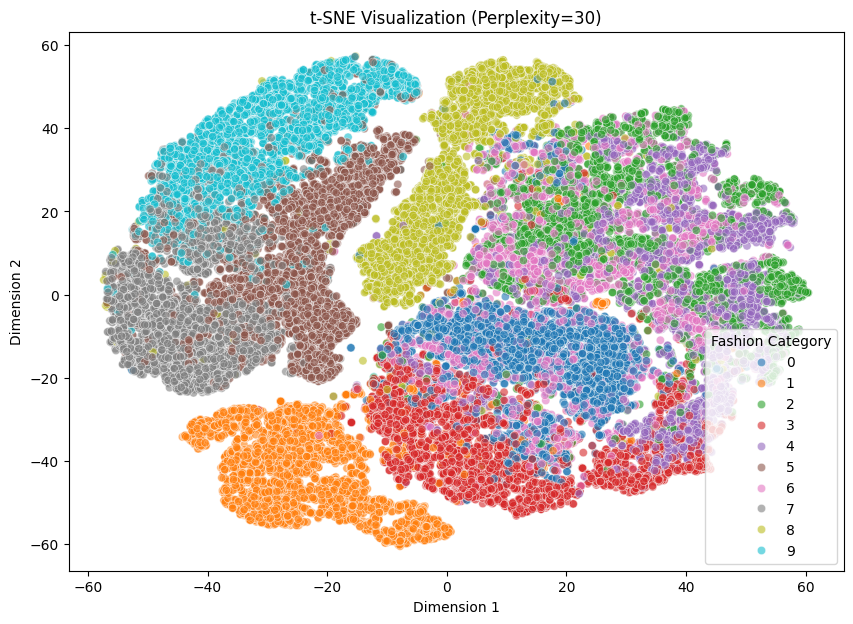

In [13]:
# Run t-SNE with default perplexity
apply_tsne(perplexity=30)